In [1]:
%matplotlib inline
from pylab import *
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pyageng

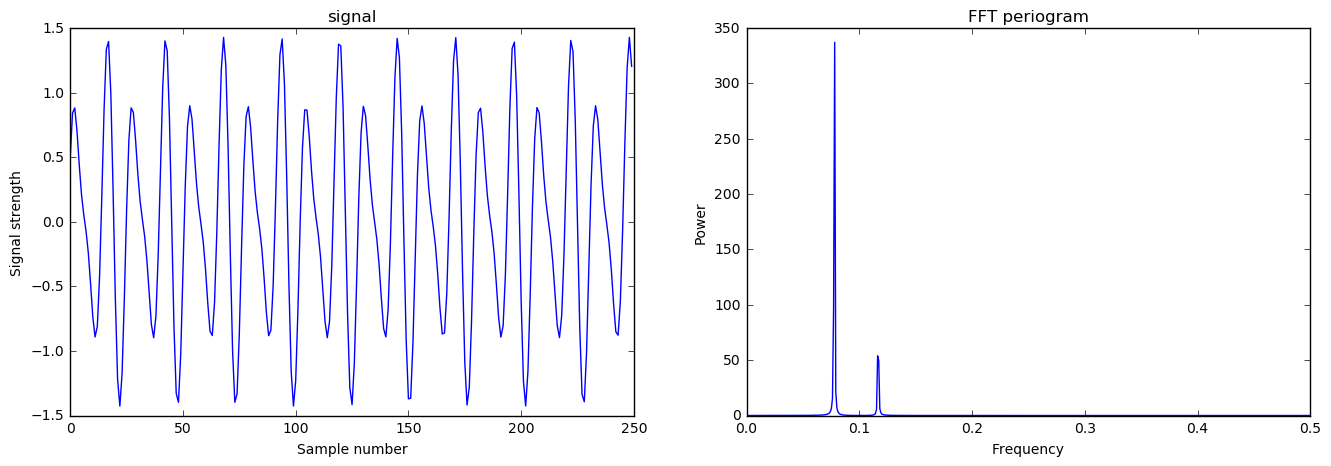

In [3]:
#Create a signal
f1 = 40;  # Hz
f2 = 1;  # Hz
Signal = lambda x: np.cos(2*pi*f1*t) + 0.5*np.cos(2*pi*f2*t)

x = np.sin(np.linspace(0., 500, 1024)) + 0.5*np.cos(np.linspace(0, 750, 1024))

plt.figure(figsize=(16,5))
subplot(121)
plot(x[:250])
plt.title('signal')
plt.ylabel('Signal strength')
plt.xlabel('Sample number')
subplot(122)
pyageng.pfft(x)

plt.show()

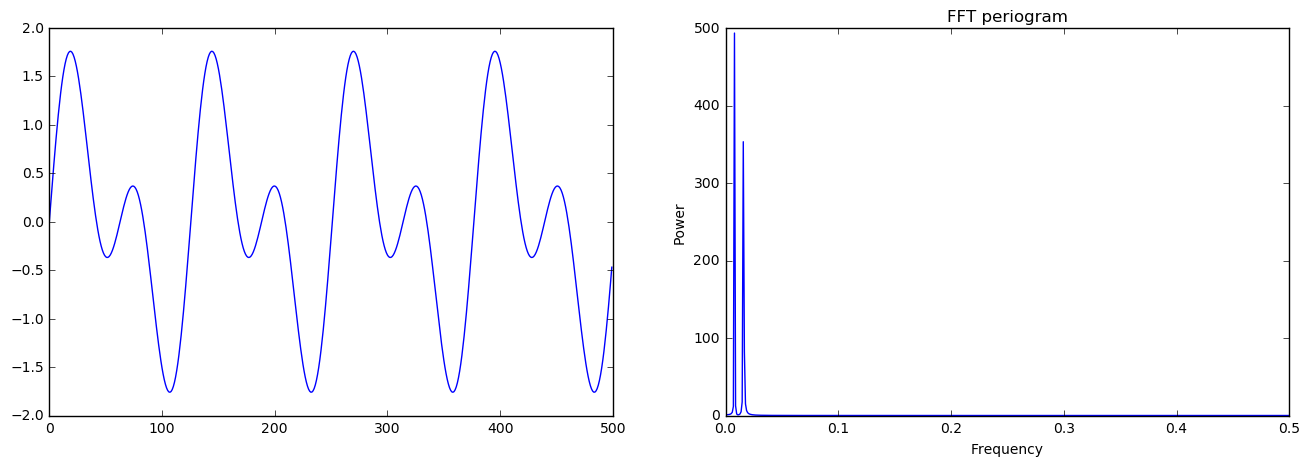

In [4]:
Signal = lambda x: np.sin(0.1*x) + np.sin(0.05*x)

t = linspace(0, 1024, 1024)
y = Signal(t)

plt.figure(figsize=(16,5))
subplot(121)
plot(y[:500])
subplot(122)
pyageng.pfft(y)

## Sampling theorem

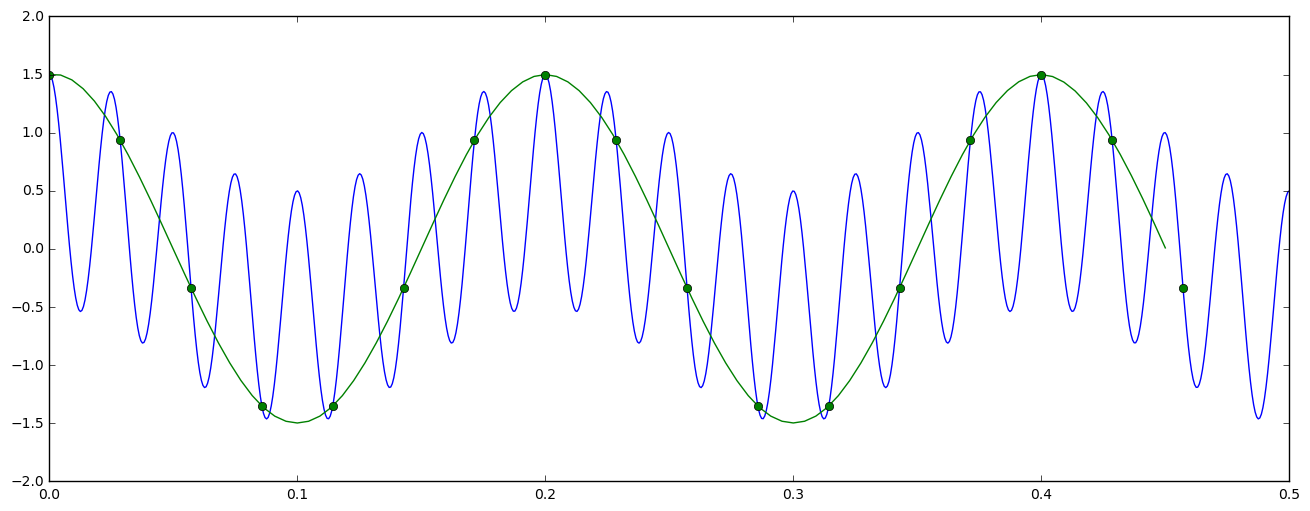

In [37]:
from numpy import linspace,cos,pi,ceil,floor,arange
from pylab import plot,show,axis

f1 = 40;  # Hz
f2 = 5.;  # Hz
# probar f2 = 5., 1., 
Signal = lambda t: np.cos(2*pi*f1*t) + 0.5*np.cos(2*pi*f2*t)

tmin = 0.;
tmax = 0.5;
t = np.linspace(tmin, tmax, 800);
s = Signal(t); # signal sampling

plt.figure(figsize=(16,6))
plot(t, s)


# sampling the signal with a sampling rate of 35 Hz
# note that 35 Hz is under the Nyquist rate.
# tomar muestras a una tasa de 35 Hz (por debajo de la frecuencia de Nyquist, que es de 80)

T = 1/35.0;

nmin = ceil(tmin / T);
nmax = floor(tmax / T);
n = arange(nmin,nmax);
x = n*T
y = Signal(x);

# interpolacion lineal
#plot(x,y,'ro',x, y, 'r-')

# spline cubico
cubic_spline = scipy.interpolate.interp1d(x, y, kind='cubic')
xfine = np.linspace(tmin, 0.45, num=100)
plot(xfine, cubic_spline(xfine), 'g') 
plot(x,y,'go')

axis([tmin, tmax, -2., 2.])
show()

In [6]:
import numpy as np
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

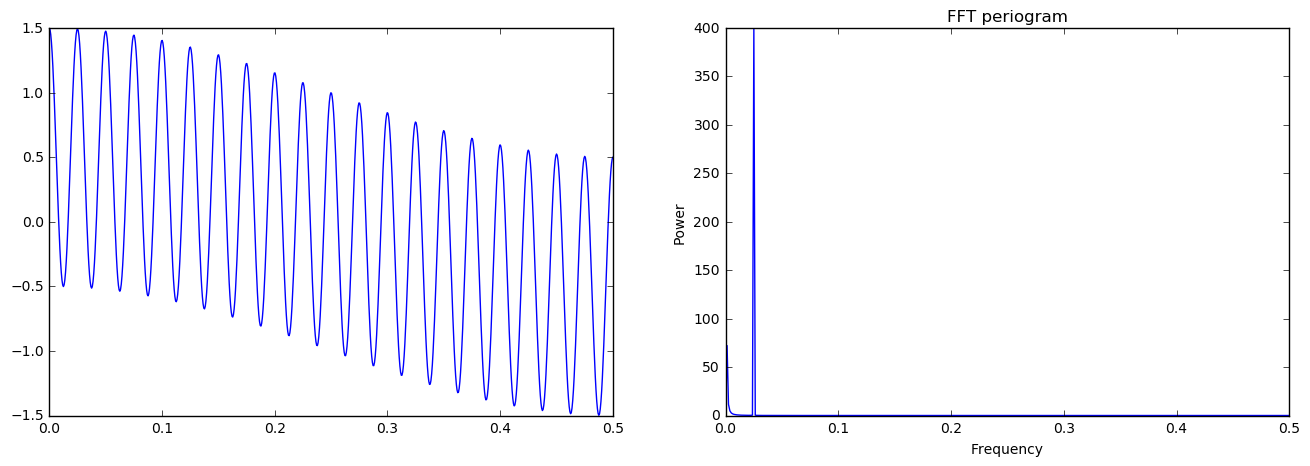

In [7]:
f1 = 40;  # Hz
f2 = 1;  # Hz
Signal = lambda t: np.cos(2*pi*f1*t) + 0.5*np.cos(2*pi*f2*t)

tmin = 0.;
tmax = 0.5;
t = np.linspace(tmin, tmax, 800);
s = Signal(t); # signal sampling

plt.figure(figsize=(16,5))
subplot(121)
plot(t, s)
subplot(122)
pyageng.pfft(s)

/store/TeachJob/AstrometriaI/pythings/local/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


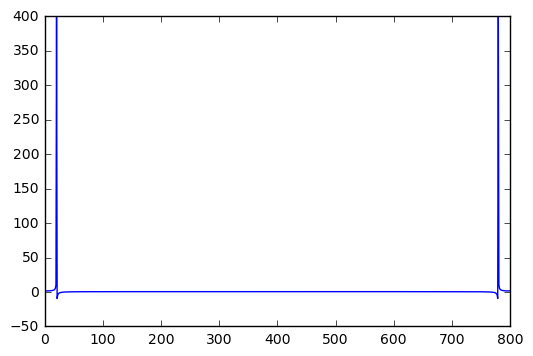

In [8]:
y = DFT_slow(s)
#y = np.fft.fft(x)
plot(y)

In [9]:
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

10000 loops, best of 3: 55 µs per loop
The slowest run took 30.92 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.82 µs per loop


## Resources

https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/
    


http://pyageng.mpastell.com/book/spectrum.html